# Source Counts

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## Download


In [2]:
download_chandra_obsid 1838 evt2
mv -fv 1838/primary/*evt2.fits.gz .
gunzip -f *evt2.fits.gz 
rmdir -p 1838/primary


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits        3 Mb  ####################          < 1 s  25130.8 kb/s

'1838/primary/acisf01838N004_evt2.fits.gz' -> './acisf01838N004_evt2.fits.gz'


In [3]:
dmcopy "acisf01838N004_evt2.fits[energy=300:8000]" acis_1838_evt2.fits clob+

## Regions

In [4]:
cat << EOM > src.reg
circle(4060.8724,4239.33,20)
EOM

cat << EOM > bkg.reg
annulus(4060.8724,4239.33,86,114)
EOM

[1] 56300
[1]+  Done                    ds9 acis_1838_evt2.fits -scale log -region src.reg -region bkg.reg -pan to 4072 4248 physical -saveimage png ds9_01.png


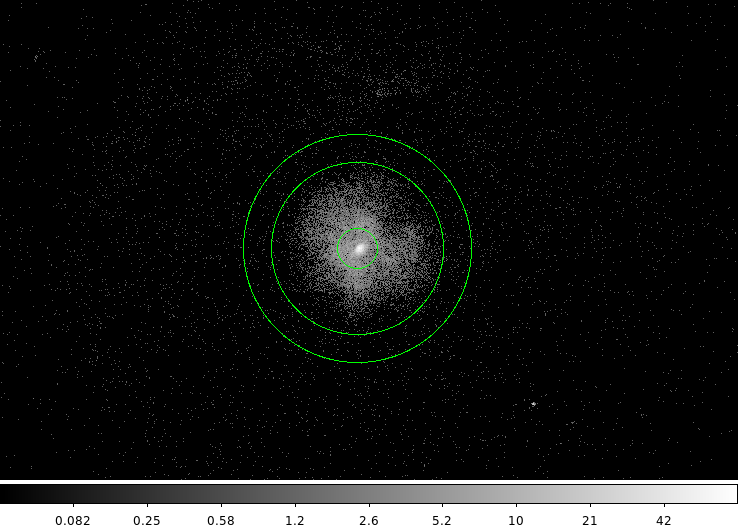

In [5]:
ds9 acis_1838_evt2.fits -scale log -region src.reg -region bkg.reg  \
  -pan to 4072 4248 physical \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

### Dmextract

In [6]:
pset dmextract infile="acis_1838_evt2.fits[bin sky=circle(4060.8724,4239.33,20)]"
pset dmextract outfile=1838_simple.fits
pset dmextract bkg="acis_1838_evt2.fits[bin sky=annulus(4060.8724,4239.33,86,114)]"
pset dmextract opt=generic 

dmextract mode=h clob+

In [7]:
dmlist "1838_simple.fits[HISTOGRAM][cols counts,net_counts]" data

 
--------------------------------------------------------------------------------
Data for Table Block HISTOGRAM
--------------------------------------------------------------------------------
 
ROW    COUNTS               NET_COUNTS
 
     1               7792.0      7746.2857142857


```bash
prism 1838_simple.fits &

sleep 3 
import -window prism prism_01.png
xpaset -p prism select col 14
xpaset -p prism quit
display < prism_01.png
```

## Using region files

In [8]:
cat src.reg

circle(4060.8724,4239.33,20)


In [9]:
cat bkg.reg

annulus(4060.8724,4239.33,86,114)


In [10]:
dmextract infile="acis_1838_evt2.fits[bin sky=region(src.reg)]" \
    outfile=1838_simple_2.fits \
    bkg="acis_1838_evt2.fits[bin sky=region(bkg.reg)]" opt=generic \
    mode=h clo+

In [11]:
dmlist "1838_simple.fits[cols counts,net_counts]" data,clean

#  COUNTS               NET_COUNTS
               7792.0      7746.2857142857


## Regions vs. Stacks

In [12]:
cat << EOM > stack.reg
circle(4060.8724,4239.33,20)
circle(4244,4094,6)
EOM

In [13]:
cat << EOM > stackbgd.reg
annulus(4060.8724,4239.33,40,60)
annulus(4244,4094,10,30)
EOM

In [14]:
dmextract infile="acis_1838_evt2.fits[bin sky=@stack.reg]" \
  outfile=1838_stack.fits \
  bkg="acis_1838_evt2.fits[bin sky=@stackbgd.reg]" opt=generic clob+

In [15]:
dmlist "1838_stack.fits[cols counts,area,bg_counts,bg_area,net_counts,net_err]" data

 
--------------------------------------------------------------------------------
Data for Table Block HISTOGRAM
--------------------------------------------------------------------------------
 
ROW    COUNTS               AREA                 BG_COUNTS            BG_AREA              NET_COUNTS           NET_ERR
 
     1               7792.0      1256.6370614359               5057.0      6283.1853071796              6780.60        89.4107376102
     2                  3.0       113.0973355292                119.0      2513.2741228718              -2.3550         1.8002708130


In [16]:
dmextract infile="acis_1838_evt2.fits[bin sky=region(stack.reg)]" \
  outfile=1838_region.fits \
  bkg="acis_1838_evt2.fits[bin sky=region(stackbgd.reg)]" opt=generic clob+

In [17]:
dmlist "1838_region.fits[cols counts,area,bg_counts,bg_area,net_counts,net_err]" data


 
--------------------------------------------------------------------------------
Data for Table Block HISTOGRAM
--------------------------------------------------------------------------------
 
ROW    COUNTS               AREA                 BG_COUNTS            BG_AREA              NET_COUNTS           NET_ERR
 
     1               7795.0      1369.7343969651               5176.0      8796.4594300514      6989.0228571429        88.9972030746


## Using Dax

[1] 56396
[1]+  Done                    ds9 acis_1838_evt2.fits -pan to 4072 4248 physical -scale log -regions load bkg.reg -regions select all -regions background -regions select none -regions load src.reg


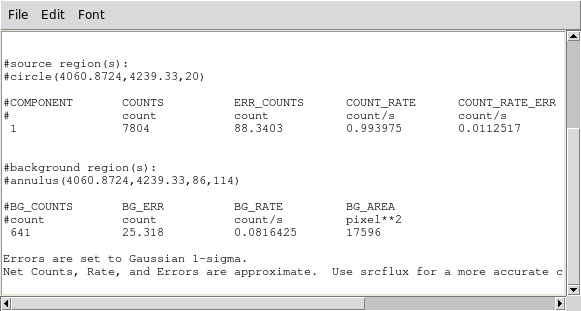

In [18]:
ds9 acis_1838_evt2.fits \
  -pan to 4072 4248 physical \
  -scale log \
  -regions load bkg.reg \
  -regions select all \
  -regions background \
  -regions select none \
  -regions load src.reg &
sleep 3

xpaset -p ds9 analysis task '{Net Counts}'
sleep 2 

import -window 'Net Counts' net_counts.png 
xpaset -p ds9 quit

display < net_counts.png

# Cleanup



In [19]:
/bin/rm -f acisf01838N004_evt2.fits acis_1838_evt2.fits